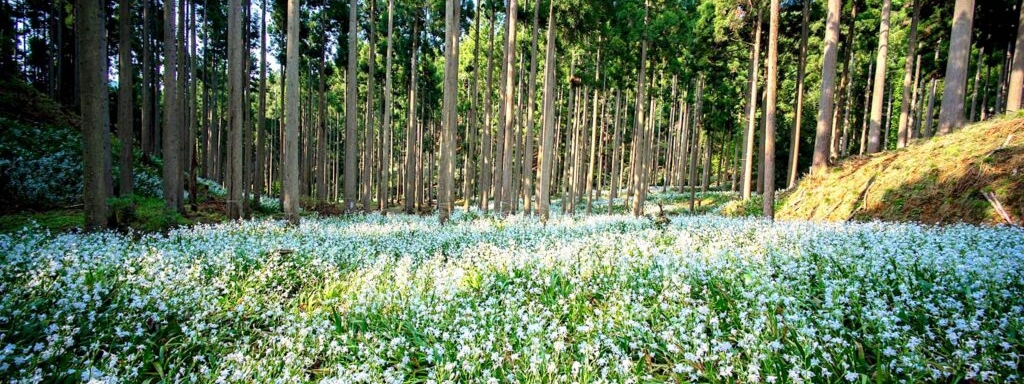

# Infomap for Ashu Forest Pollination Network
---
### Data :Kyoto University Forest of Ashu -  Kato et al. (1990)
http://www.ecologia.ib.usp.br/iwdb/html/kato_1990.html  
The dataset includes a matrix of the interactions, ie which insect pollinations at on each plant.  

# Introduction

### Infomap 

Infomap is a network clustering algorithm based on the Map Equation framework. The basic idea behind the InfoMap algorithm is to use community partitions of the graph as a Huffman code that compresses the information about a random walker exploring your graph. The central object is a random walker exploring the network with the probability that the walker transitions between two nodes given by its Markov transition matrix. At this point, we have effectively coded our network with an individual codeword for each node. However, in most real-world networks, we know that there are regions of the network such that once the random walker enters a region, it tends to stay there for a long time, and movements between the regions are relatively rare. This allows us to combinatorially combine codewords into Huffman codes: we can use a prefix code for each region, and then use a unique codeword for each node within a module, but we can reuse these node level codewords for each module. 

$$L(M)=q_{\curvearrowright} H(\mathcal{Q})+\sum_{i=1}^m p_{\circlearrowright}^i H\left(\mathcal{P}^i\right)$$
* $L(M)$: This represents the description length of the network partitioning $M$ using the map equation.
* $q_{\curvearrowright}$: The probability of moving between different modules (communities) in the network. This indicates the probability of transitioning from one module to another during a random walk on the network.
* $H(\mathcal{Q})$: The entropy of the distribution of module transitions. This measures the uncertainty or randomness of moving between different modules.
* $m$: The number of modules (communities) in the network partition.
* $p_{\circlearrowright}^i$: The probability of moving within module $i$ during a random walk.
* $H(\mathcal{P}^i)$: The entropy of the distribution of node destinations within module $i$. Similar to the original map equation, this term captures the uncertainty of where the random walk will lead within module $i$.

Example of network from our results
<img src="https://github.com/jjackson1994/Information_Theory/blob/main/images/infomap_eample_bi.jpeg?raw=true" width =600>


## Data preprocessing 

### Data Extraction
The input data was in the form of an interaction martrix the raw matrix is plotted as follows

In [1]:
import pandas as pd
import os
import re 
import numpy as np

cwd = os.getcwd()
filepath= os.path.join(cwd, 'data','Original_data', 'kato_et_al_1990.xls')
sheets = ['matr','pla+pol','pla','pol']
sheet = sheets[0]
df = pd.read_excel(filepath, sheet_name = sheet, header = [0,1,2])
df

Unnamed: 0_level_0 plant_ge      Acer  \
                               Unnamed: 0_level_1 plant_sp rufinerve   
                                        pol_ge_sp      no.         1   
0                       ACHILIDAE1 (Ach. : Hem. )       53         0   
1    Acteniceromorphus nipponensis (Ela. : Col. )      398         0   
2                 Actina jezoensis (Str. : Dip. )      139         0   
3        Adelphocoris triannulatus (Mir. : Hem. )       28         0   
4                      AGALLIIDAE1 (Aga. : Hem. )       47         0   
..                                            ...      ...       ...   
674                      LUSIIDAE1 (Clu. : Dip. )      675         0   
675          Lasioglossum (El.) aff (Hal. : Hym )      676         0   
676                 Camponotus sp. (For. : Hym. )      677         0   
677                    Andrena sp. (And. : Hym. )      678         0   
678                    Ceratina sp. (Ant. : Hym.)      679         0   

    Adenocaulon  Aesculus Agrimonia  Ainsliaea      Alangium       Ampelopsis  \
     himalaicum turbinata    pilosa acerifolia platanifolium brevipedunculata   
              2         3         4          5             6                7   
0             0         0         0          0             0                0   
1             0         0         0          0             0                0   
2             0         0         0          0             0                0   
3             0         0         0          0             0                0   
4             0         0         0          0             0                0   
..          ...       ...       ...        ...           ...              ...   
674           0         0         0          0             0                0   
675           0         0         0          0             0                0   
676           0         0         0          0             0                0   
677           0         0         0          0             0                0   
678           0         0         0          0             0                0   

     Anemone  ... Tripterospermum Viburnum      Viola                     \
    flaccida  ...       japonicum plicatum grypoceras kusanoana vaginata   
           8  ...              84       85         86        87       88   
0          0  ...               0        0          0         0        0   
1          0  ...               0        0          0         0        0   
2          0  ...               0        0          0         0        0   
3          0  ...               0        0          0         0        0   
4          0  ...               0        0          0         0        0   
..       ...  ...             ...      ...        ...       ...      ...   
674        0  ...               0        0          0         0        0   
675        0  ...               0        0          0         0        0   
676        0  ...               0        0          0         0        0   
677        0  ...               0        0          0         0        0   
678        0  ...               0        0          0         0        0   

                Weigela      Cornus       Caryopteris   
    verecunda hortensis controversa kousa   divaricata  
           89        90          91    92           93  
0           0         0           0     0            0  
1           0         0           0     0            0  
2           0         0           0     0            0  
3           0         0           0     0            0  
4           0         0           0     0            0  
..        ...       ...         ...   ...          ...  
674         0         0           0     0            0  
675         0         0           0     0            0  
676         0         0           0     0            0  
677         0         0           0     0            0  
678         0         0           0     0            0  

[679 rows x 95 columns]

In [2]:
plant_genus   = df.columns.get_level_values(0)[2::]
plant_species = df.columns.get_level_values(1)[2::]
plant_numbers = df.columns.get_level_values(0)[3::]
plant_species

Index(['rufinerve', 'himalaicum', 'turbinata', 'pilosa', 'acerifolia',
       'platanifolium', 'brevipedunculata', 'flaccida', 'polymorpha',
       'pubescens', 'filiforme', 'aemula', 'dioicus', 'glehni', 'thunbergii',
       'japonica', 'kousa', 'tenuicaulis', 'delphiniifolia', 'alternifolia',
       'divaricatum', 'crenata', 'japonicum', 'kagamontanum', 'micranthum',
       'communis', 'lineariloba', 'pallida', 'japonica', 'podocarpum',
       'crenata', 'sessile', 'grandiflorum', 'alatus', 'sieboldianus',
       'nepalense', 'japonicum', 'tomentella', 'hirta', 'macrophylla',
       'paniculata', 'noli-tangere', 'textori', 'dentata', 'yomena', 'bicolor',
       'obtusifolium', 'clethroides', 'salicifolia', 'griffithii', 'villosa',
       'aestiva', 'pubescens', 'senticosa', 'thunbergii', 'japonicus',
       'amurense', 'asiatica', 'macranthum', 'Grayana', 'incisa', 'salicina',
       'longituba', 'trichocarpa', 'japonica', 'javanica', 'trichocarpa',
       'multiflora', 'illecebrosus

In [3]:
df.columns = ['pollenators', 'no.']+list(plant_species)
poll_num = df['no.'] 
df=df.drop(columns='no.')

In [4]:
df['pollenators']=df['pollenators'].apply(lambda x: re.sub(r'\([^)]*\)|\[[^]]*\]', '', x))
poll_species = df['pollenators']
df=df.set_index('pollenators')
df

,rufinerve,himalaicum,turbinata,pilosa,acerifolia,platanifolium,brevipedunculata,flaccida,polymorpha,pubescens,...,japonicum,plicatum,grypoceras,kusanoana,vaginata,verecunda,hortensis,controversa,kousa,divaricata
pollenators,,,,,,,,,,,,,,,,,,,,,
ACHILIDAE1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Acteniceromorphus nipponensis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Actina jezoensis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Adelphocoris triannulatus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AGALLIIDAE1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LUSIIDAE1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Lasioglossum aff,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Camponotus sp.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
poll_species = np.char.replace(poll_species.to_numpy(dtype=str), ' ', '_')#pandas->np->elements->string->replace space

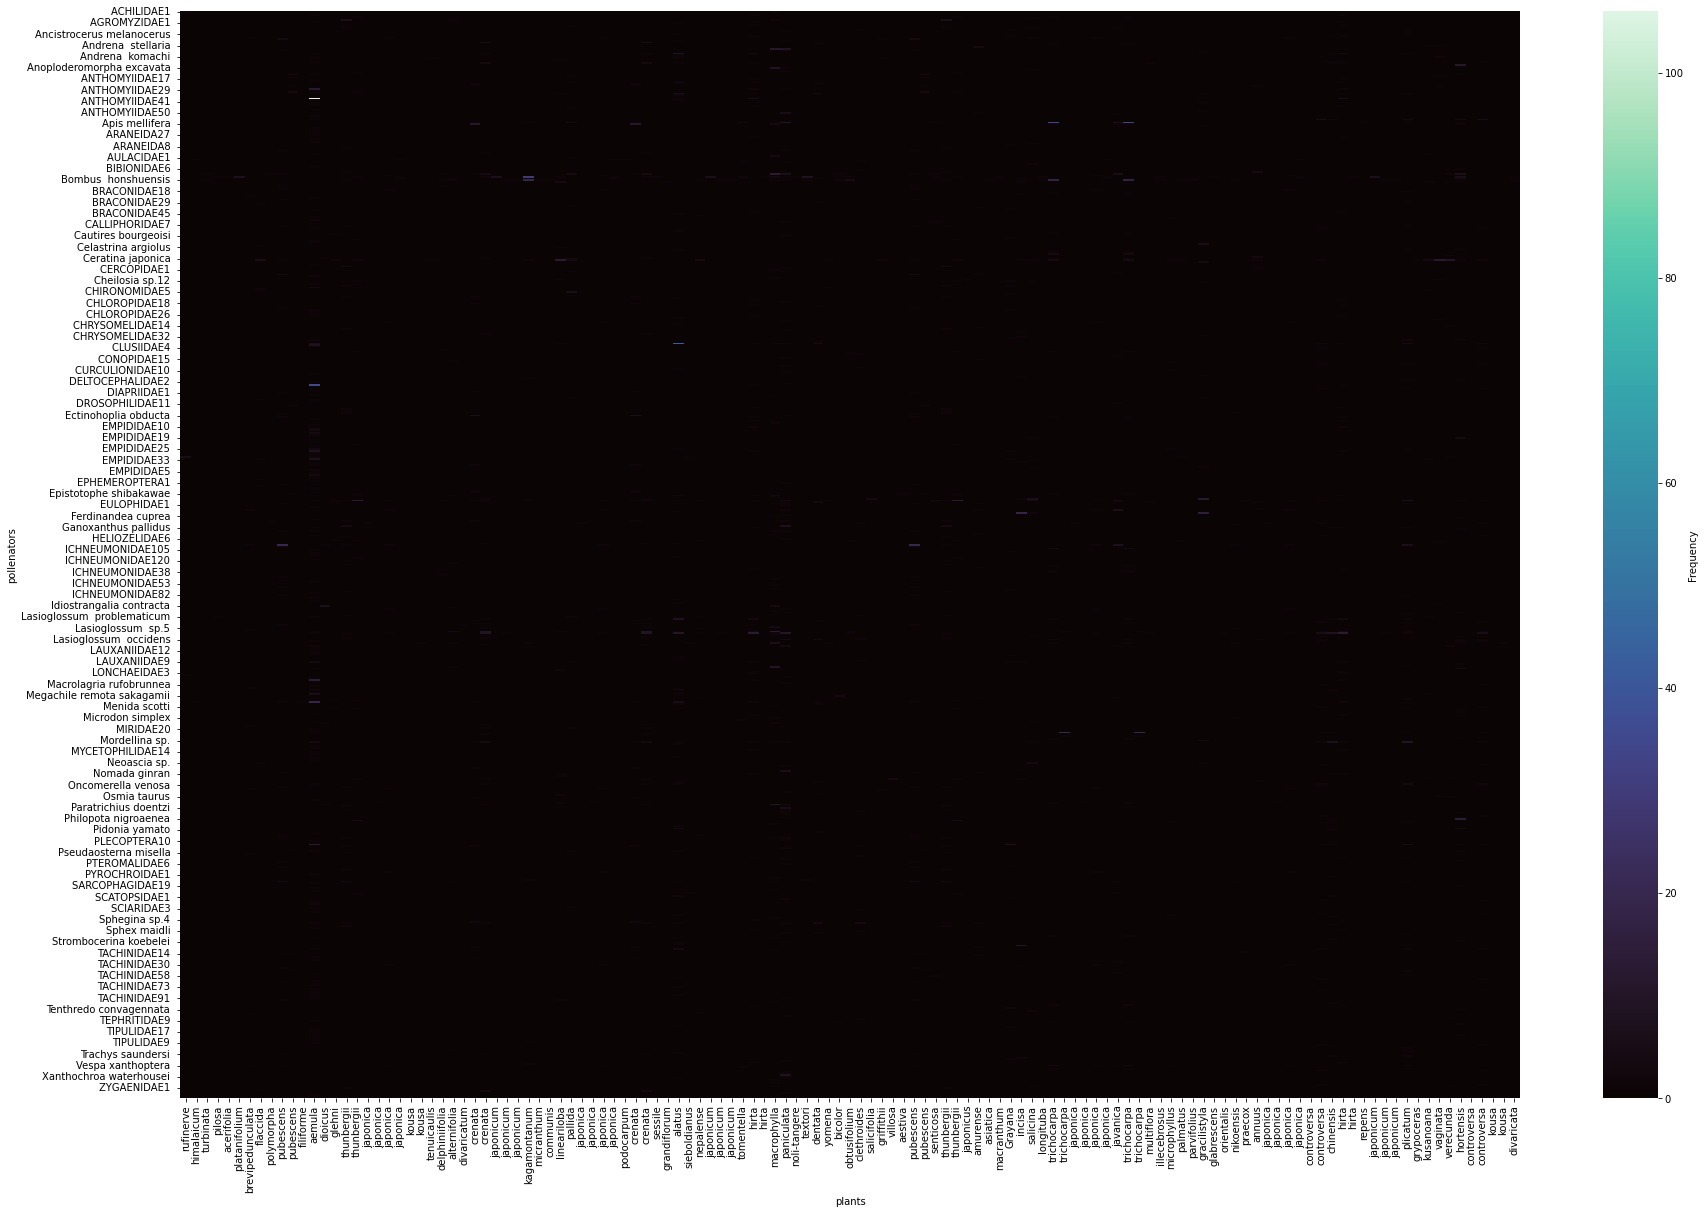

In [6]:
import seaborn as sn
import matplotlib.pyplot as plt 
plt.figure(figsize = (30,20))
plt.xlabel('plant')
heatmap=sn.heatmap(df[plant_species], 
                   cmap=sn.color_palette("mako", as_cmap=True),
                   cbar_kws={'label': 'Frequency'})

heatmap.set(xlabel='plants')              
plt.savefig('images/all_Data_heatmap_lb',bbox_inches='tight')

## Basic data properties 
### Shannon entropy, Joint Entropy and Mutual Infomation
Formula source (M. Allegra)  

$$H[X]=-\sum_{i=1}^{N}p_{X}(x_i)\log p_{X}(x_i)$$

This is the average information needed to specify the outcome of the random variable. (We are working in bits so $log_2$)

#### Joint entropy

\begin{equation}
    H[X,Y]=H(p_{X,Y})=-\sum_{i,j}p_{i,j}\log p_{i,j}
\end{equation}
#### Mutual Information
The mutual information between $X$ and $Y$ is defined as
\begin{equation}
    I[X:Y]=H[X]+H[Y]-H[X,Y]=H[Y]-H[Y|X]=H[X]-H[X|Y]
\end{equation}

In [22]:
def shannon_entropy(p): #Now simplified, I verfied this works for both array joint and marginal dists
    p=p[p != 0] # zero prob elements don't exist
    log_p = np.log2(p) #log2 every element of array
    p_log_p = p*log_p 
    return -p_log_p.sum() 

def mutual_info(joint_dist,marg_1, marg_2):
    return shannon_entropy(marg_1)+shannon_entropy(marg_2)-shannon_entropy(joint_dist)   

def raw_bit_content(Ar):# Node this is fed the frequency array not the dist
    N_Ax=Ar.sum()
    return np.log2(N_Ax)    

def calc_info_on_network(Ar, threshold = 1): 
    Ar[Ar<=threshold]=0 #apply threshold
    joint_dist = Ar/Ar.sum() # normalize
    plants_marg = joint_dist.sum(axis =1) #sum across rows 
    poll_marg =joint_dist.sum(axis =0)    #sum across cols
    return {'H_joint': shannon_entropy(joint_dist), 
            'H_plant': shannon_entropy(plants_marg), 
            'H_poll': shannon_entropy(poll_marg), 
            'mutual_info':mutual_info(joint_dist,plants_marg,poll_marg),
            'H_0' : raw_bit_content(Ar)}
    

In [32]:
threhold_network_info = {thr:calc_info_on_network(df.to_numpy(copy=True),threshold=thr) for thr in range(15)}
threhold_network_info

{0: {'H_joint': 9.363770924255007,
  'H_plant': 7.880828627431691,
  'H_poll': 5.000711834174941,
  'mutual_info': 3.517769537351624,
  'H_0': 11.224001674198105},
 1: {'H_joint': 7.593102378504596,
  'H_plant': 6.35043741134894,
  'H_poll': 4.680324176280379,
  'mutual_info': 3.437659209124724,
  'H_0': 10.553629293916364},
 2: {'H_joint': 6.750410218840335,
  'H_plant': 5.7318799547573,
  'H_poll': 4.484126595964826,
  'mutual_info': 3.465596331881791,
  'H_0': 10.220378327695228},
 3: {'H_joint': 6.211814151935105,
  'H_plant': 5.26752737735292,
  'H_poll': 4.285075677508935,
  'mutual_info': 3.34078890292675,
  'H_0': 9.997179480937621},
 4: {'H_joint': 5.8696171202117995,
  'H_plant': 5.071671072022663,
  'H_poll': 4.143582461805853,
  'mutual_info': 3.3456364136167167,
  'H_0': 9.848622940429339},
 5: {'H_joint': 5.657196401841616,
  'H_plant': 4.934045414895674,
  'H_poll': 4.034413676582075,
  'mutual_info': 3.3112626896361315,
  'H_0': 9.751544059089099},
 6: {'H_joint': 5.272

## Interaction matrix -> infomap

Here we are fetching the data from the interaction matrix and putting it back into a format that infomap can run on.  

Cols is just the number of pollenators, in this case 93. Since both pollenators and the plants indexs start from zero. To make each index unique, we shift the pollenator indexs to start after the plant indexs (adding 1000 to make them visually distinct). 

## Simple data no lablel

In [9]:
threshold_freq = 5
start_pol = 1000 


f = open("data/monopartite,"+"freq_thr_"+str(threshold_freq), "w")
array=df.to_numpy()
rows, cols = array.shape

for row in range(rows):
    for col in range(len(array[row])):
        if array[row][col]>=threshold_freq:
            f.write(str(start_pol+poll_num[row])+' '+ str(col)+ ' '+ str(array[row][col]) +'\n')
f.close()

In [8]:
array=df.to_numpy()
array.shape

(679, 94)

## Monopartite

In [26]:
array=df.to_numpy()
rows, cols = array.shape
start_pol =1000
threshold_freqs = range(0,16)
for thres in threshold_freqs: 
    threshold_freq = thres
    f_mono = open("t_mono"+str(threshold_freq), "w") #Data with the text label
    nodes, features  = {}, {}, # trying the bipartite format
    network = ''
    for row in range(rows):
        for col in range(len(array[row])):
            if array[row][col]>=threshold_freq:
                pol_num = start_pol+poll_num[row] #making the numbers unique 
                nodes[str(pol_num)] =  poll_species[row]
                if plant_species[col] not in features.keys():
                    features[plant_species[col]] = col 
                interaction = str(pol_num)+' '+ str(features[plant_species[col]])+ ' '+ str(array[row][col]) +'\n'
                network += interaction

    f_mono.write('#N nodes = '+str(len(nodes)) + ', N features = '+str(len(features))+'\n')
    f_mono.write('\n*Vertices '+str(len(nodes)+len(features))+'\n')

    
    for key in nodes:
        f_mono.write(key+' "'+ nodes[key]+'" \n')
    features_swap = {v: k for k, v in features.items()}# ugly swap of keys and features but done as it
    #gives output in the correct order ie feature num 1 2,3,4, ect
    for key in features_swap:
        f_mono.write(str(key)+' "'+ features_swap[key]+'" \n')

    f_mono.write('\n*Arcs \n')
    f_mono.write(network)

    f_mono.close()

#### Copy to clipboard (for website)
```Bash
xclip -sel c < ~/info_theory/Information_Theory/data_text.txt
```

## Running Infomap on Python
https://mapequation.github.io/infomap/python/

can run but i have no idea how to save the output
Command line flags can be added as a string to Infomap

In [11]:
from infomap import Infomap

im=Infomap('-o tree --')
im.readInputData('data/data_num.txt')
im.run()

. Found 3 levels with codelength 2.958645578

=> Trial 1/1 finished in 0.003186744s with codelength 2.95864558


Summary after 1 trial
Best end modular solution in 3 levels:
Per level number of modules:         [         18,           2,           0] (sum: 20)
Per level number of leaf nodes:      [          0,          74,           8] (sum: 82)
Per level average child degree:      [         18,     4.22222,           4] (average: 6.63617)
Per level codelength for modules:    [0.374674428, 0.064296041, 0.000000000] (sum: 0.438970469)
Per level codelength for leaf nodes: [0.000000000, 2.168715028, 0.350960081] (sum: 2.519675109)
Per level codelength total:          [0.374674428, 2.233011069, 0.350960081] (sum: 2.958645578)

  Infomap ends at 2023-07-26 10:52:56
  (Elapsed time: 0.01356251s)
Parsing undirected network from file 'data/data_num.txt'...
  Parsing links...
  -> 80 links
Done!
-------------------------------------
  -> 82 nodes
  -> 80 links with total weight 922
  Infomap v2

In [3]:
im.get_dataframe()

,path,flow,name,node_id
0,"(1, 1)",0.126898,11,11
1,"(1, 2)",0.060195,415,415
2,"(1, 3)",0.019523,143,143
3,"(1, 4)",0.013015,312,312
4,"(1, 5)",0.010846,507,507
...,...,...,...,...
77,"(16, 2)",0.003254,226,226
78,"(17, 1)",0.003254,12,12
79,"(17, 2)",0.003254,548,548
80,"(18, 1)",0.002711,0,0
